## Problem Statement

### Context

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. The Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help

### Objective

To identify different segments in the existing customers, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.

### Data Description

The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online, and through a call center).

**Data Dictionary**
- Sl_No: Primary key of the records
- Customer Key: Customer identification number
- Average Credit Limit: Average credit limit of each customer for all credit cards
- Total credit cards: Total number of credit cards possessed by the customer
- Total visits bank: Total number of visits that the customer made (yearly) personally to the bank
- Total visits online: Total number of visits or online logins made by the customer (yearly)
- Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

## Importing necessary libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## Reading the Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Credit_Card_Customer_Data.xlsx")

## Overview of the Dataset

### Checking the shape of the dataset

In [ ]:
data.shape

(660, 7)

* The dataset has 660 rows and 7 columns

### Displaying few rows of the dataset

In [ ]:
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [ ]:
data['Customer Key'].nunique()


655

In [ ]:
data[data['Customer Key'].duplicated(keep=False)]


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,5,47437,100000,6,0,12,3
48,49,37252,6000,4,0,2,8
104,105,97935,17000,2,1,2,10
332,333,47437,17000,7,3,1,0
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2
411,412,50706,44000,4,5,0,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


In [ ]:
duplicates = data['Customer Key'][data['Customer Key'].duplicated()]
print(duplicates)

332    47437
398    96929
432    37252
541    50706
632    97935
Name: Customer Key, dtype: int64


In [ ]:
data.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


In [ ]:
# viewing a random sample of the dataset
data.sample(n=10, random_state=1)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
547,548,38125,26000,4,5,2,4
353,354,94437,9000,5,4,1,3
499,500,65825,68000,6,4,2,2
173,174,38410,9000,2,1,5,8
241,242,81878,10000,4,5,1,3
341,342,70779,18000,4,3,2,0
647,648,79953,183000,9,0,9,2
218,219,28208,19000,3,1,5,7
120,121,16577,10000,4,2,4,6
134,135,31256,13000,4,1,5,7


### Creating a copy of original data

In [5]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

### Checking the data types of the columns for the dataset

In [ ]:
# checking datatypes and number of non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


**Observations**

- All seven columns are numerical columns

### Let's take a look at the summary of the data

In [ ]:
# Let's look at the statistical summary of the data
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


In [ ]:
columns_to_check = [
    'Total_Credit_Cards',
    'Total_visits_bank',
    'Total_visits_online',
    'Total_calls_made'
]

for col in columns_to_check:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts().sort_index())



Value counts for 'Total_Credit_Cards':
Total_Credit_Cards
1      59
2      64
3      53
4     151
5      74
6     117
7     101
8      11
9      11
10     19
Name: count, dtype: int64

Value counts for 'Total_visits_bank':
Total_visits_bank
0    100
1    112
2    158
3    100
4     92
5     98
Name: count, dtype: int64

Value counts for 'Total_visits_online':
Total_visits_online
0     144
1     109
2     189
3      44
4      69
5      54
6       1
7       7
8       6
9       4
10      6
11      5
12      6
13      5
14      1
15     10
Name: count, dtype: int64

Value counts for 'Total_calls_made':
Total_calls_made
0      97
1      90
2      91
3      83
4     108
5      29
6      39
7      35
8      30
9      32
10     26
Name: count, dtype: int64


In [ ]:
# Let's see unique values
cols = df.columns

for col in cols:
    print("Unique values in the column '{}' are \n\n".format(col), df[col].unique())
    print("-" * 100)

Unique values in the column 'Sl_No' are 

 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236

## Checking the missing values

In [ ]:
# checking for missing values
df.isnull().sum()

,0
Sl_No,0
Customer Key,0
Avg_Credit_Limit,0
Total_Credit_Cards,0
Total_visits_bank,0
Total_visits_online,0
Total_calls_made,0


## Checking for duplicates values

In [ ]:
# checking for duplicate values
df.duplicated().sum()

np.int64(0)

- There are no duplicate values in the data.

# **Data Preprocessing**

### Checking for missing values

In [ ]:
# checking for missing values

df.isnull().sum()

,0
Sl_No,0
Customer Key,0
Avg_Credit_Limit,0
Total_Credit_Cards,0
Total_visits_bank,0
Total_visits_online,0
Total_calls_made,0


## Exploratory Data Analysis

### Univariate Analysis

In [6]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [7]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
df.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

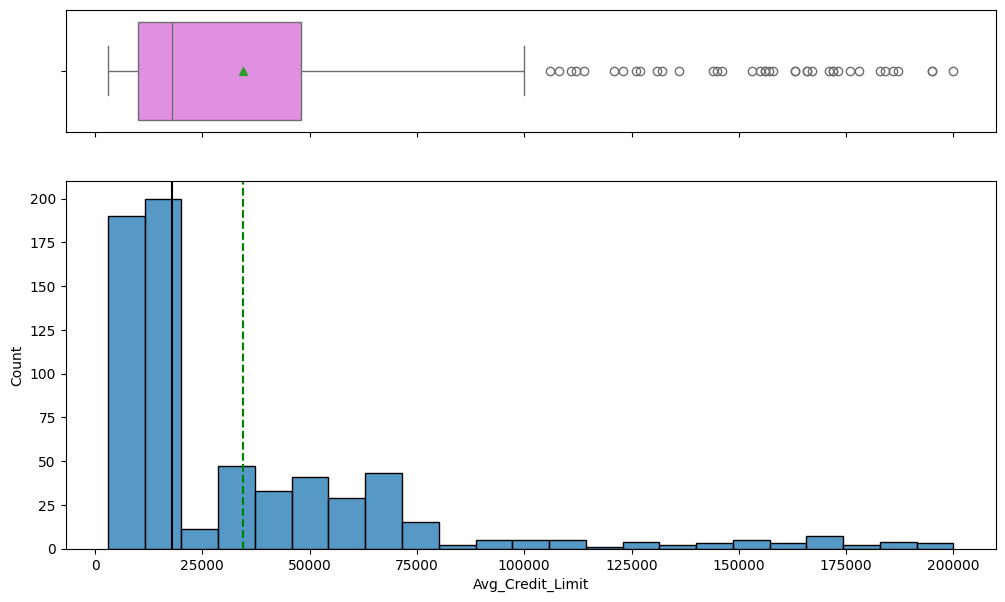

In [ ]:
histogram_boxplot(df, "Avg_Credit_Limit")

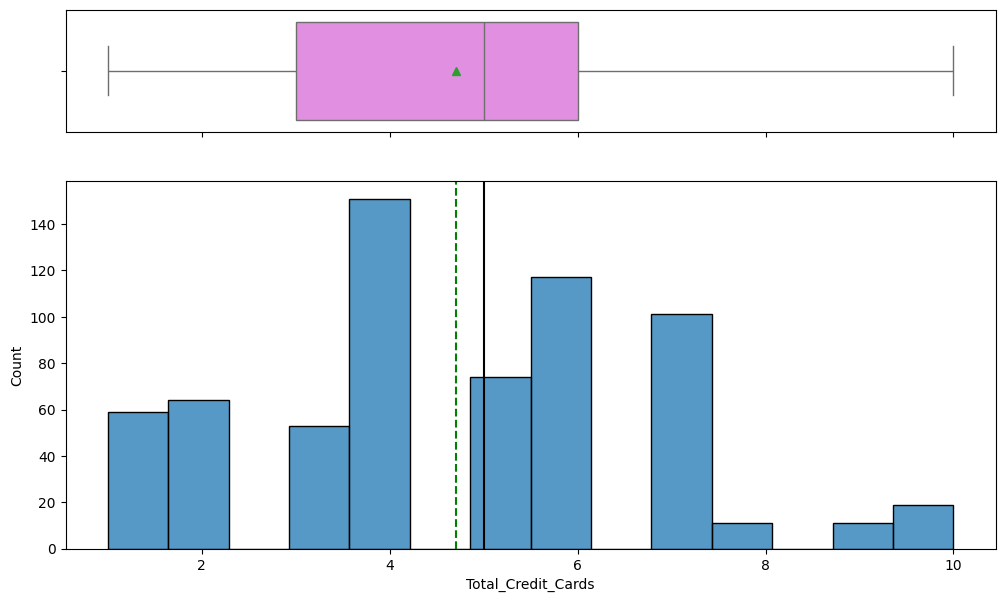

In [ ]:
histogram_boxplot(df, "Total_Credit_Cards")

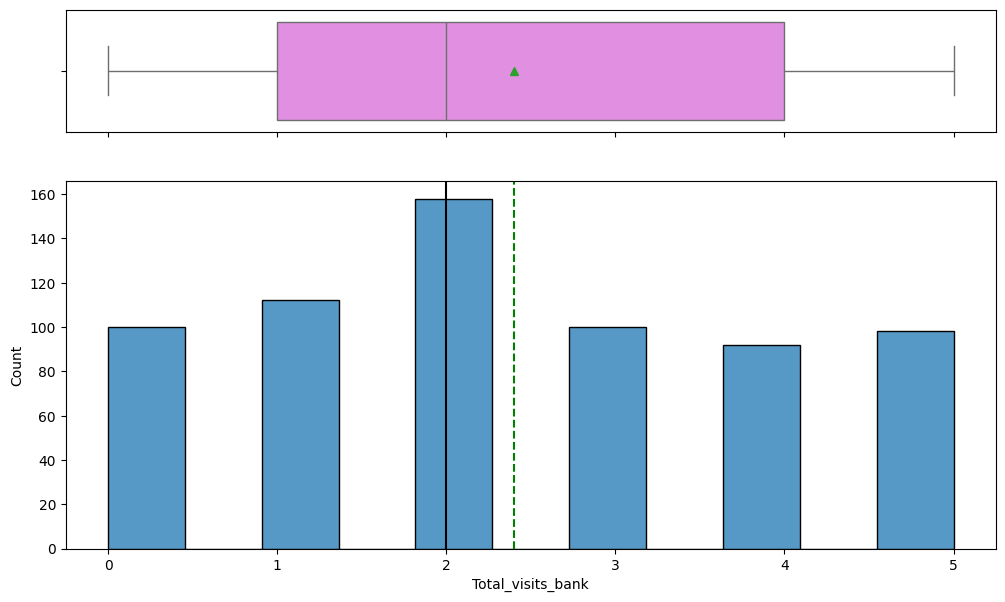

In [ ]:
histogram_boxplot(df, "Total_visits_bank")

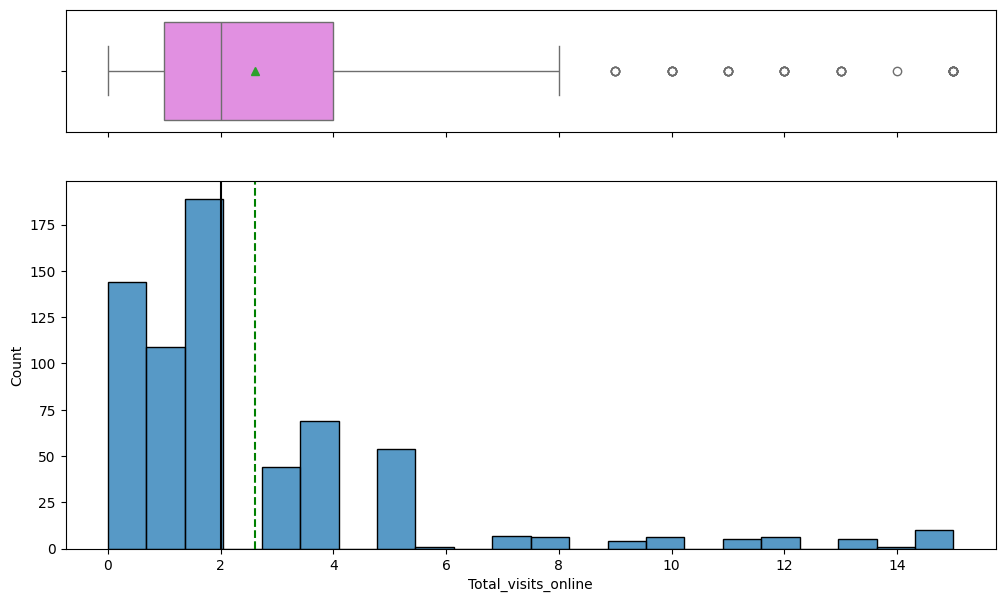

In [ ]:
histogram_boxplot(df, "Total_visits_online")

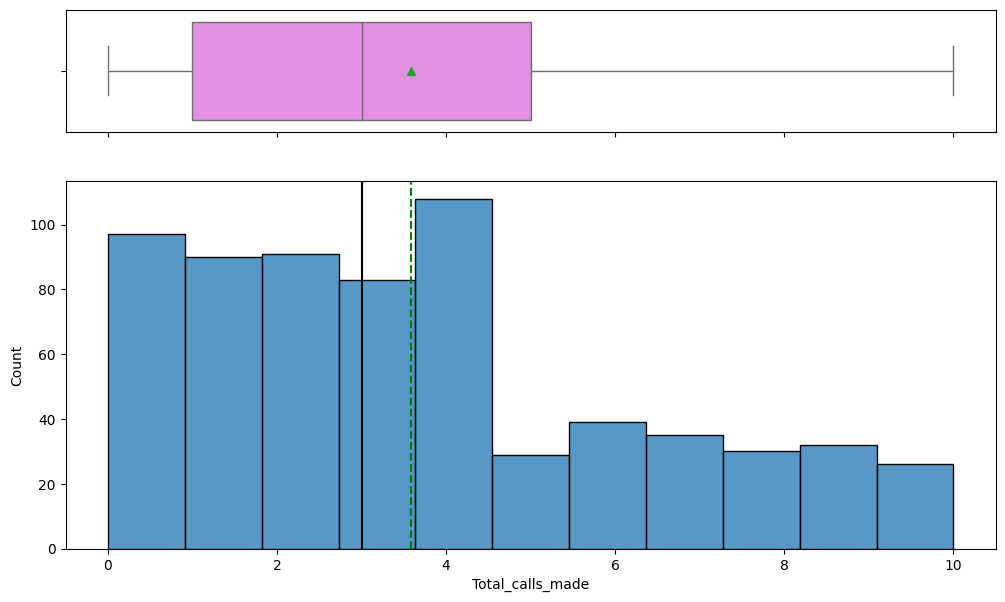

In [ ]:
histogram_boxplot(df, "Total_calls_made")

### Bivariate Analysis

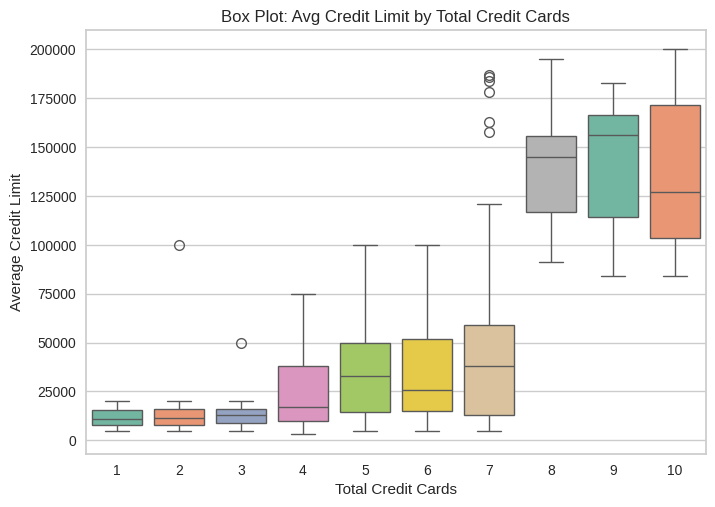

In [ ]:
sns.boxplot(data=df, x='Total_Credit_Cards', y='Avg_Credit_Limit', palette='Set2')
plt.title("Box Plot: Avg Credit Limit by Total Credit Cards")
plt.xlabel("Total Credit Cards")
plt.ylabel("Average Credit Limit")
plt.show()

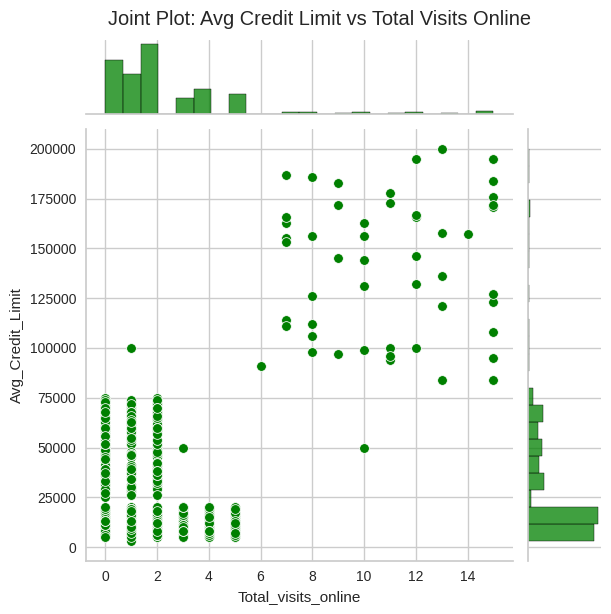

In [ ]:
# Joint plot: Avg_Credit_Limit vs Total_visits_online
sns.jointplot(data=df, x='Total_visits_online', y='Avg_Credit_Limit', kind='scatter', color='green')
plt.suptitle("Joint Plot: Avg Credit Limit vs Total Visits Online", y=1.02)
plt.show()


<Axes: xlabel='Total_Credit_Cards', ylabel='Avg_Credit_Limit'>

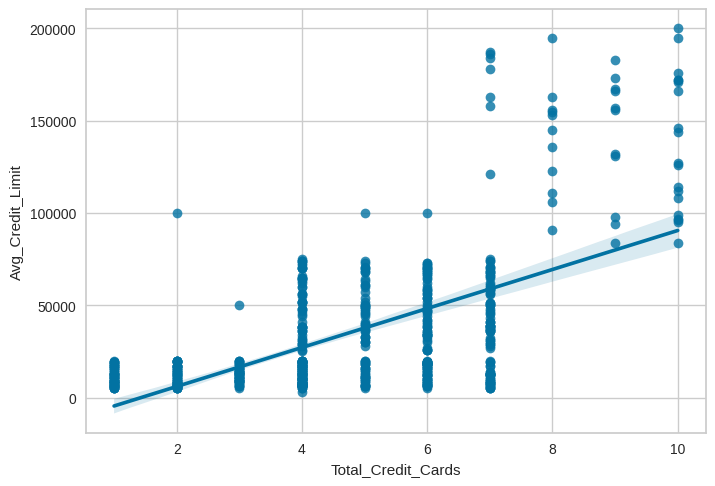

In [ ]:
sns.regplot(data=df, x='Total_Credit_Cards', y='Avg_Credit_Limit')


In [ ]:
df.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

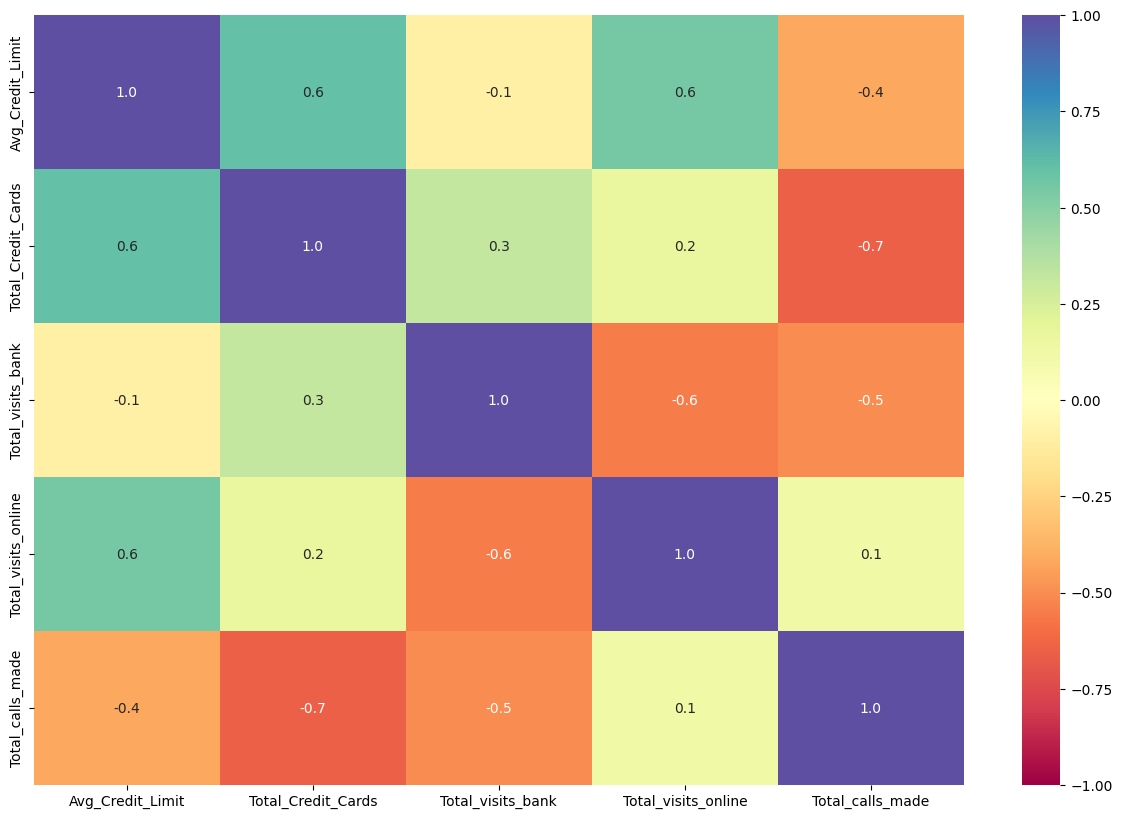

In [ ]:
cols_list = ['Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

# Now the heatmap will work
plt.figure(figsize=(15, 10))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".1f", cmap="Spectral"
)
plt.show()

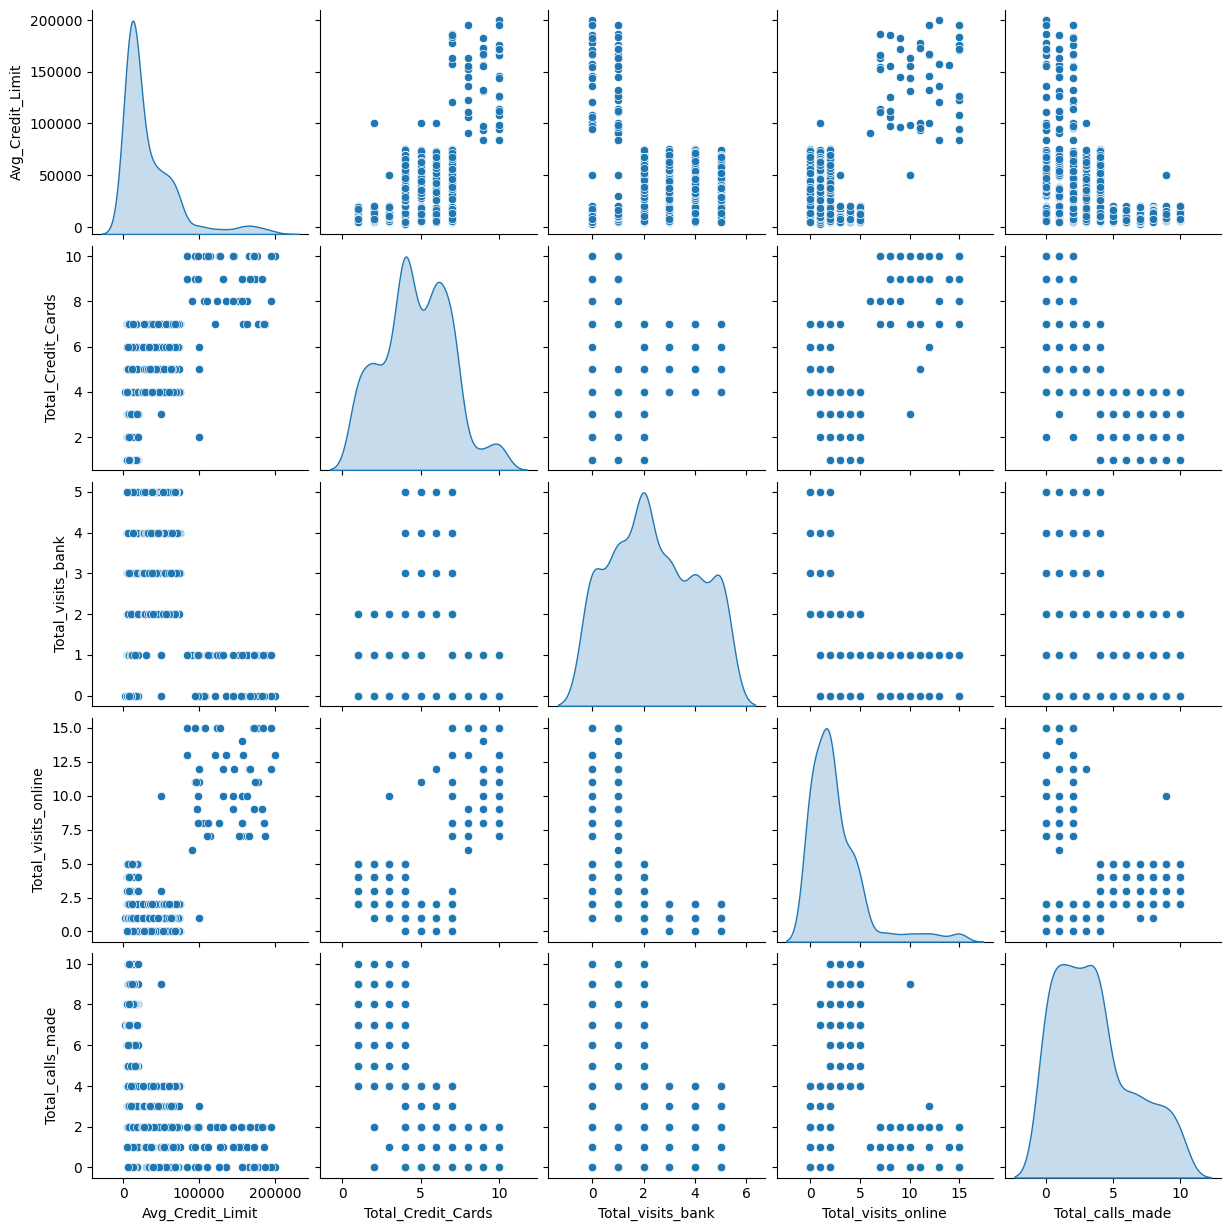

In [ ]:
sns.pairplot(data=df[cols_list], diag_kind="kde")
plt.show()

In [ ]:
def detect_outliers_iqr(df, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(data[column] < lower) | (df[column] > upper)]
    return outliers

# Example usage
outliers_avg_limit = detect_outliers_iqr(df, 'Avg_Credit_Limit')
print(f"Number of outliers in Avg_Credit_Limit: {len(outliers_avg_limit)}")


Number of outliers in Avg_Credit_Limit: 39


In [ ]:
df2= data.copy()

### Outlier dectection

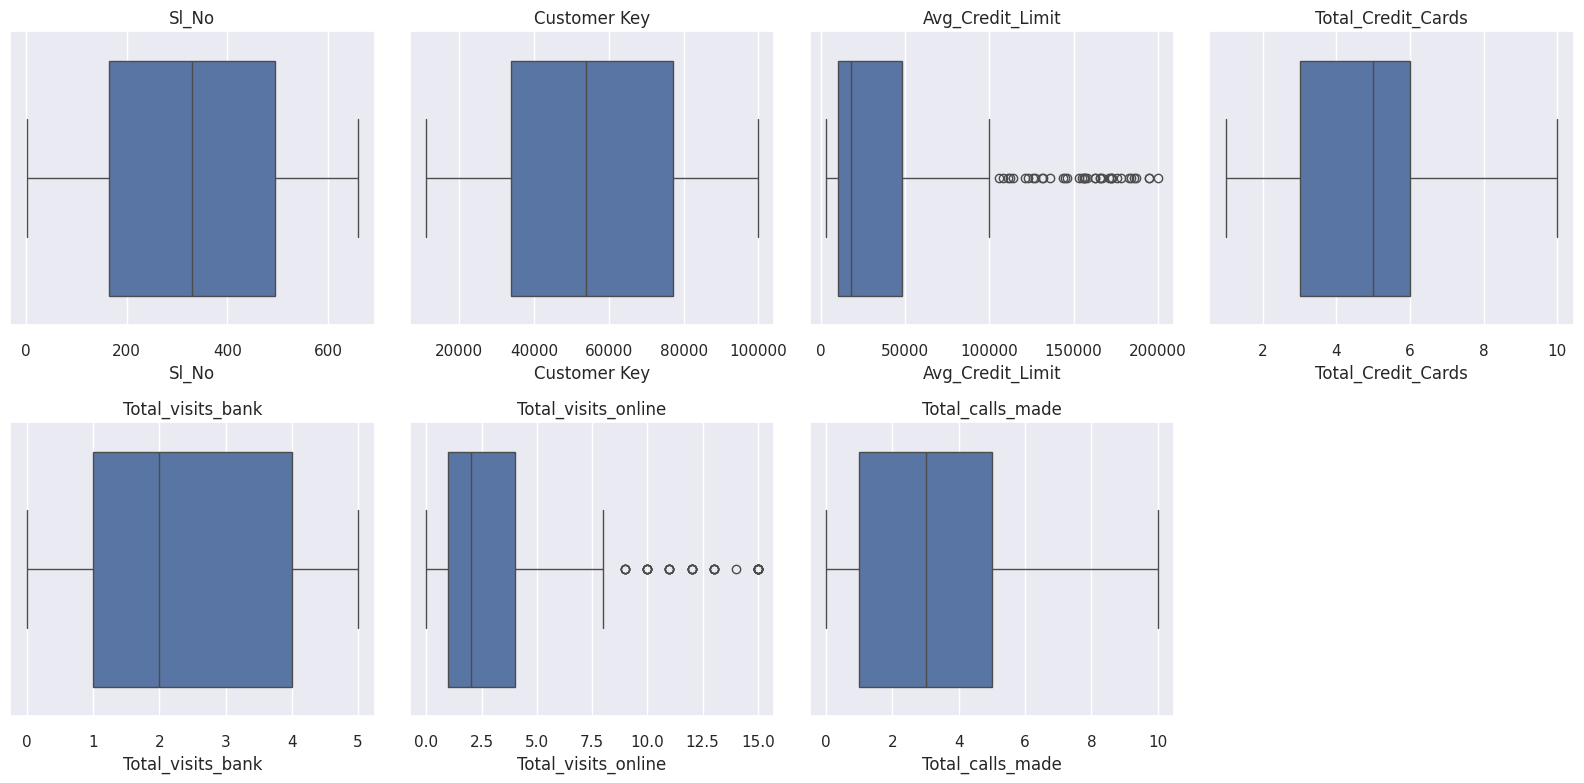

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace with your actual DataFrame
# df = pd.read_csv('your_data.csv')

# List of columns for outlier detection
cols = [
    "Sl_No",
    "Customer Key",
    "Avg_Credit_Limit",
    "Total_Credit_Cards",
    "Total_visits_bank",
    "Total_visits_online",
    "Total_calls_made"
]

# Set the plot style
sns.set(style="darkgrid")

# Set up the plot grid
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten()

# Plot each boxplot
for i, col in enumerate(cols):
    if i < len(axes):
        sns.boxplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(col)

# Hide any extra subplot
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Scaling

In [ ]:
df.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [ ]:
#Ignore

numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Step 3: Apply StandardScaler
scaler = StandardScaler()
scaled_array = scaler.fit_transform(numeric_df)

# Step 4: Create a scaled DataFrame
scaled_df = pd.DataFrame(scaled_array, columns=numeric_df.columns)

scaled_df.head()

In [8]:
sc = StandardScaler()
subset_scaled_df = pd.DataFrame(
    sc.fit_transform(df.drop(["Sl_No", "Customer Key"], axis=1)),
    columns=df.drop(["Sl_No", "Customer Key"], axis=1).columns,
)
subset_scaled_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [9]:
km_subset_scaled_df = subset_scaled_df.copy()
hc_subset_scaled_df = subset_scaled_df.copy()

In [10]:
# creating dataframe copies for k-means and hierarchical clustering
km_df = df.copy()
hc_df = df.copy()

# **Model Building**

## K-means Clustering

### Checking Elbow Plot

Number of Clusters: 2 	Average Distortion: 1.7178787250175898
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0902973540817666
Number of Clusters: 5 	Average Distortion: 0.9906853650098948
Number of Clusters: 6 	Average Distortion: 0.9515009282361341
Number of Clusters: 7 	Average Distortion: 0.9094119827472316
Number of Clusters: 8 	Average Distortion: 0.9191292344244387
Number of Clusters: 9 	Average Distortion: 0.8990131857179275
Number of Clusters: 10 	Average Distortion: 0.8723089051392604


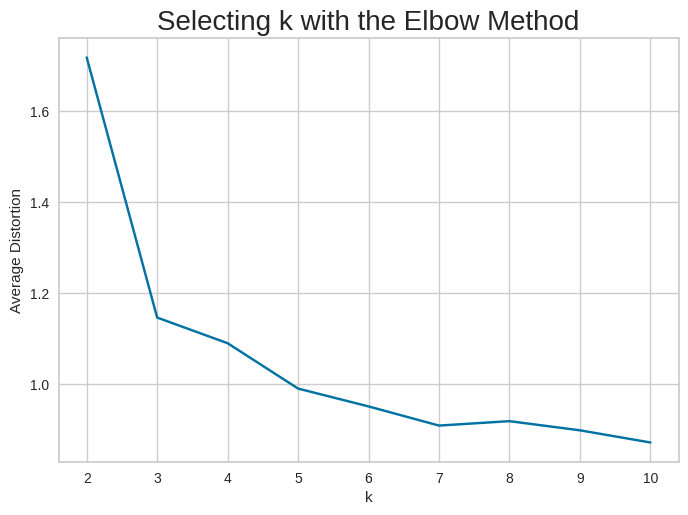

In [11]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist


clusters = range(2, 11)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(km_subset_scaled_df )
    prediction = model.predict(km_subset_scaled_df )
    distortion = (
        sum(np.min(cdist(km_subset_scaled_df , model.cluster_centers_, "euclidean"), axis=1))
        / km_subset_scaled_df .shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

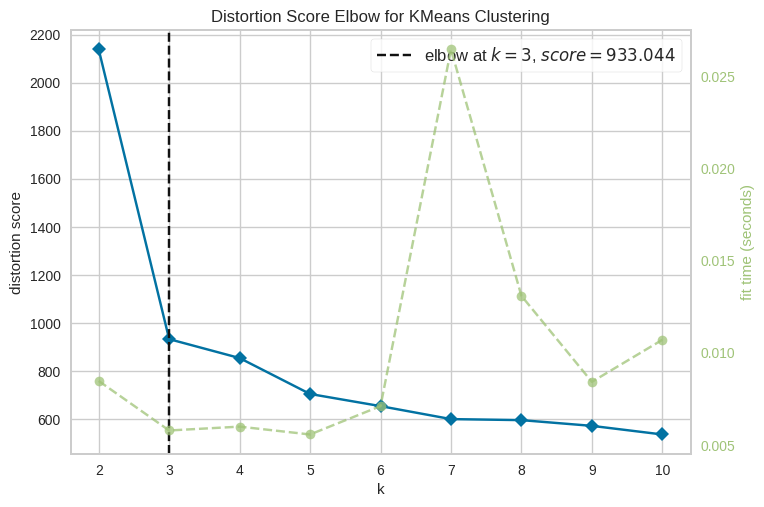

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 11), timings=True)
visualizer.fit(km_subset_scaled_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

### Checking Silhouette Scores

For n_clusters = 2, the silhouette score is 0.5703183487340514)
For n_clusters = 3, the silhouette score is 0.5157182558881063)
For n_clusters = 4, the silhouette score is 0.3744071798973986)
For n_clusters = 5, the silhouette score is 0.27167502160723267)
For n_clusters = 6, the silhouette score is 0.24804756291576194)
For n_clusters = 7, the silhouette score is 0.24791254258020035)
For n_clusters = 8, the silhouette score is 0.22570382558070443)
For n_clusters = 9, the silhouette score is 0.19931783829027247)
For n_clusters = 10, the silhouette score is 0.20939001908412339)


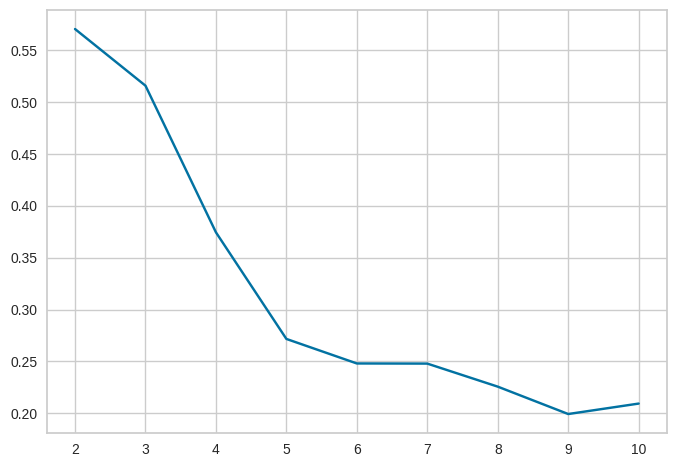

In [13]:
sil_score = []
cluster_list = range(2, 11)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((km_subset_scaled_df))
    score = silhouette_score(km_subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

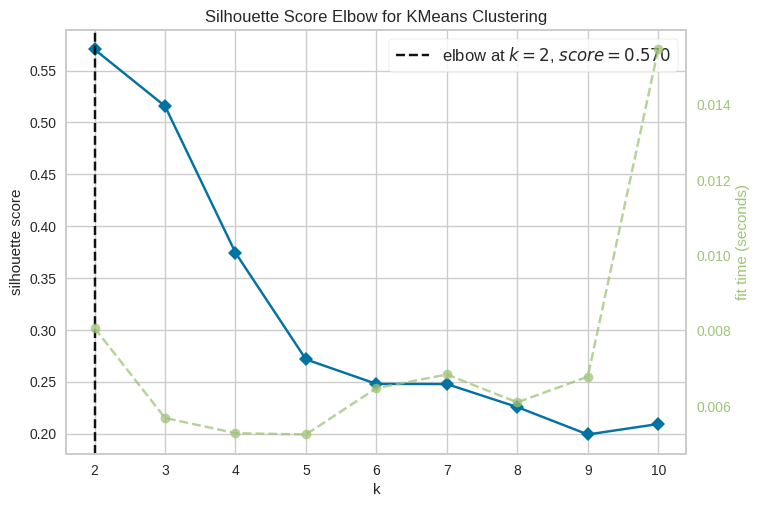

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [14]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 11), metric="silhouette", timings=True)
visualizer.fit(km_subset_scaled_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

**From the silhouette scores, it seems that 3 is a good value for k.**

**Silhouette Plot**

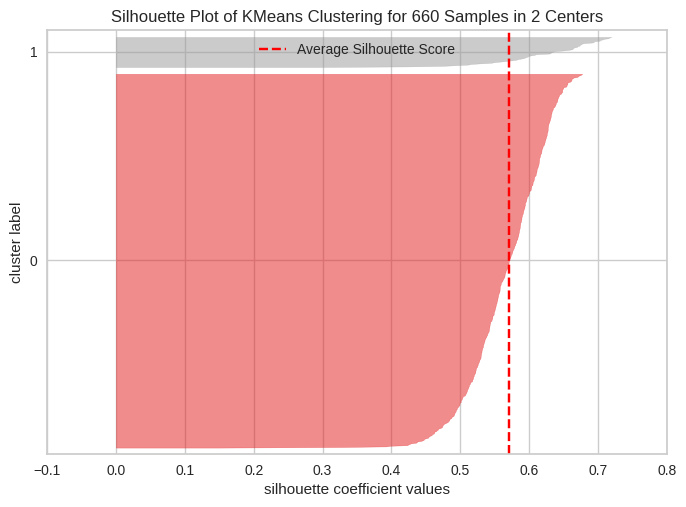

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [15]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(km_subset_scaled_df)
visualizer.show()

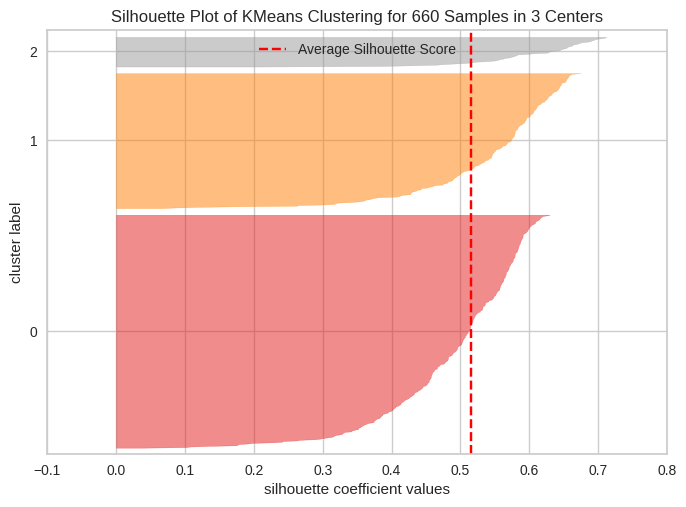

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(km_subset_scaled_df)
visualizer.show()

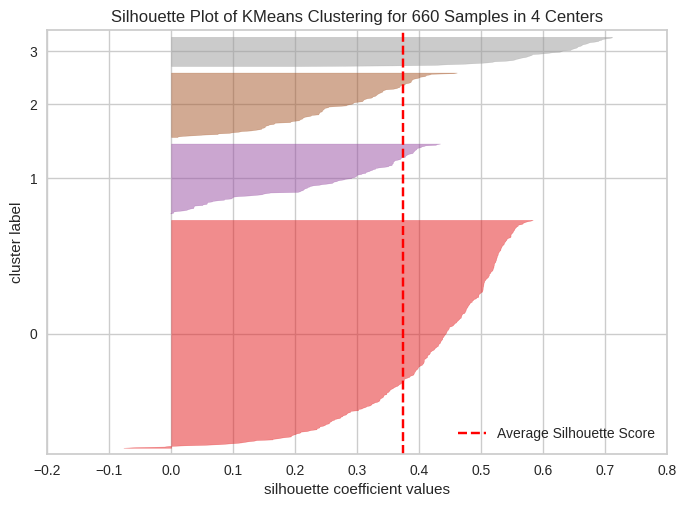

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(km_subset_scaled_df)
visualizer.show()

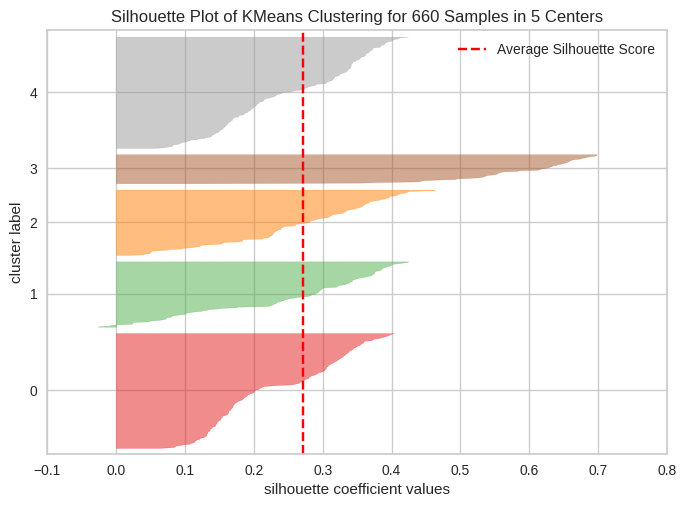

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(km_subset_scaled_df)
visualizer.show()

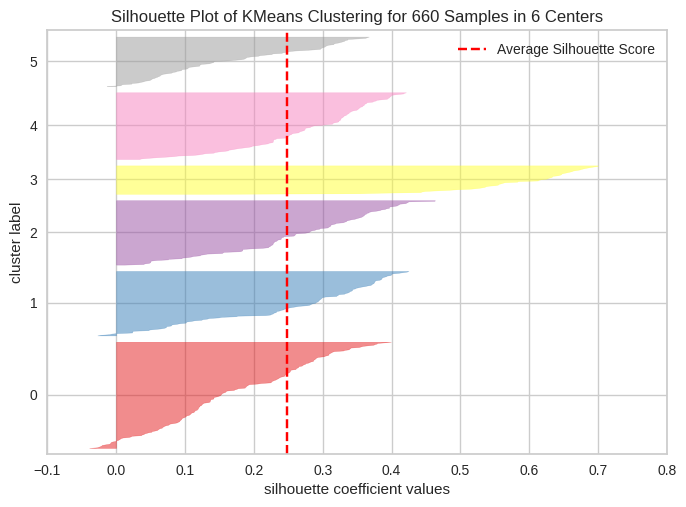

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(km_subset_scaled_df)
visualizer.show()

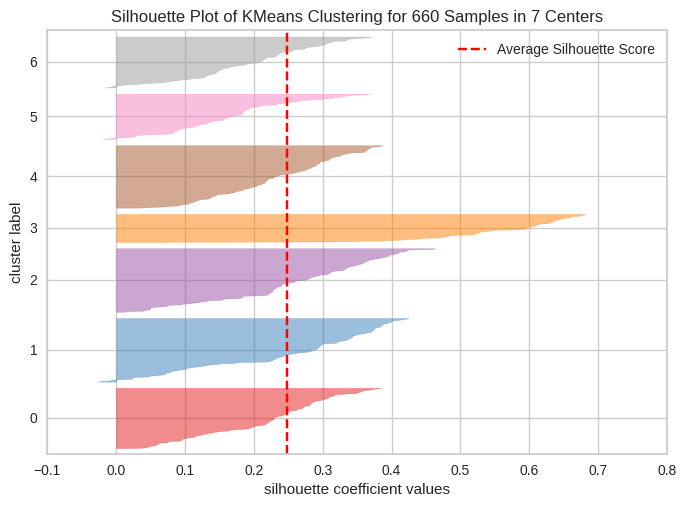

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(km_subset_scaled_df)
visualizer.show()

**We will proceed with k=3**

### Creating Final Model

In [16]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(km_subset_scaled_df)

KMeans(n_clusters=3, random_state=1)

In [17]:
# adding kmeans cluster labels to the original dataframe
km_df["KM_segments"] = kmeans.labels_

In [ ]:
km_df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KM_segments
0,1,87073,100000,2,1,1,0,0
1,2,38414,50000,3,0,10,9,1
2,3,17341,50000,7,1,3,4,0
3,4,40496,30000,5,1,1,4,0
4,5,47437,100000,6,0,12,3,2


## Hierarchical Clustering

### Computing Cophenetic Correlation

In [18]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.7391220243806552.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8599730607972423.
Cophenetic correlation for Euclidean distance and average linkage is 0.8977080867389372.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8861746814895477.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7382354769296767.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8533474836336782.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8974159511838106.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8913624010768603.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7058064784553605.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6663534463875359.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8326994115042136.
Cophenetic co

In [19]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with Euclidean distance and average linkage.


In [20]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.7391220243806552.
Cophenetic correlation for complete linkage is 0.8599730607972423.
Cophenetic correlation for average linkage is 0.8977080867389372.
Cophenetic correlation for centroid linkage is 0.8939385846326323.
Cophenetic correlation for ward linkage is 0.7415156284827493.
Cophenetic correlation for weighted linkage is 0.8861746814895477.


In [21]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with average linkage.


**We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.**

### Checking Silhouette Scores

For n_clusters = 2, the silhouette score is 0.5703183487340514)
For n_clusters = 3, the silhouette score is 0.515922432650965)
For n_clusters = 4, the silhouette score is 0.47495143595793504)
For n_clusters = 5, the silhouette score is 0.44039753024783956)
For n_clusters = 6, the silhouette score is 0.4153547954831452)
For n_clusters = 7, the silhouette score is 0.4183775674672025)
For n_clusters = 8, the silhouette score is 0.34306710358280806)
For n_clusters = 9, the silhouette score is 0.3415486932890892)
For n_clusters = 10, the silhouette score is 0.34550947121387965)


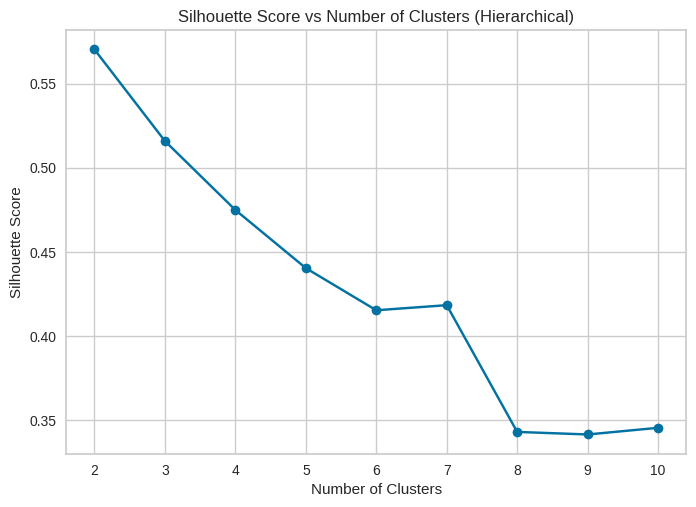

In [25]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

sil_score = []
cluster_list = range(2, 11)

for n_clusters in cluster_list:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
    preds = clusterer.fit_predict(hc_subset_scaled_df )
    score = silhouette_score(hc_subset_scaled_df , preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

# Plotting
plt.plot(cluster_list, sil_score, marker='o')
plt.title("Silhouette Score vs Number of Clusters (Hierarchical)")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


### Checking Dendrograms

**We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.**


**Let's view the dendrograms for the different linkage methods.**

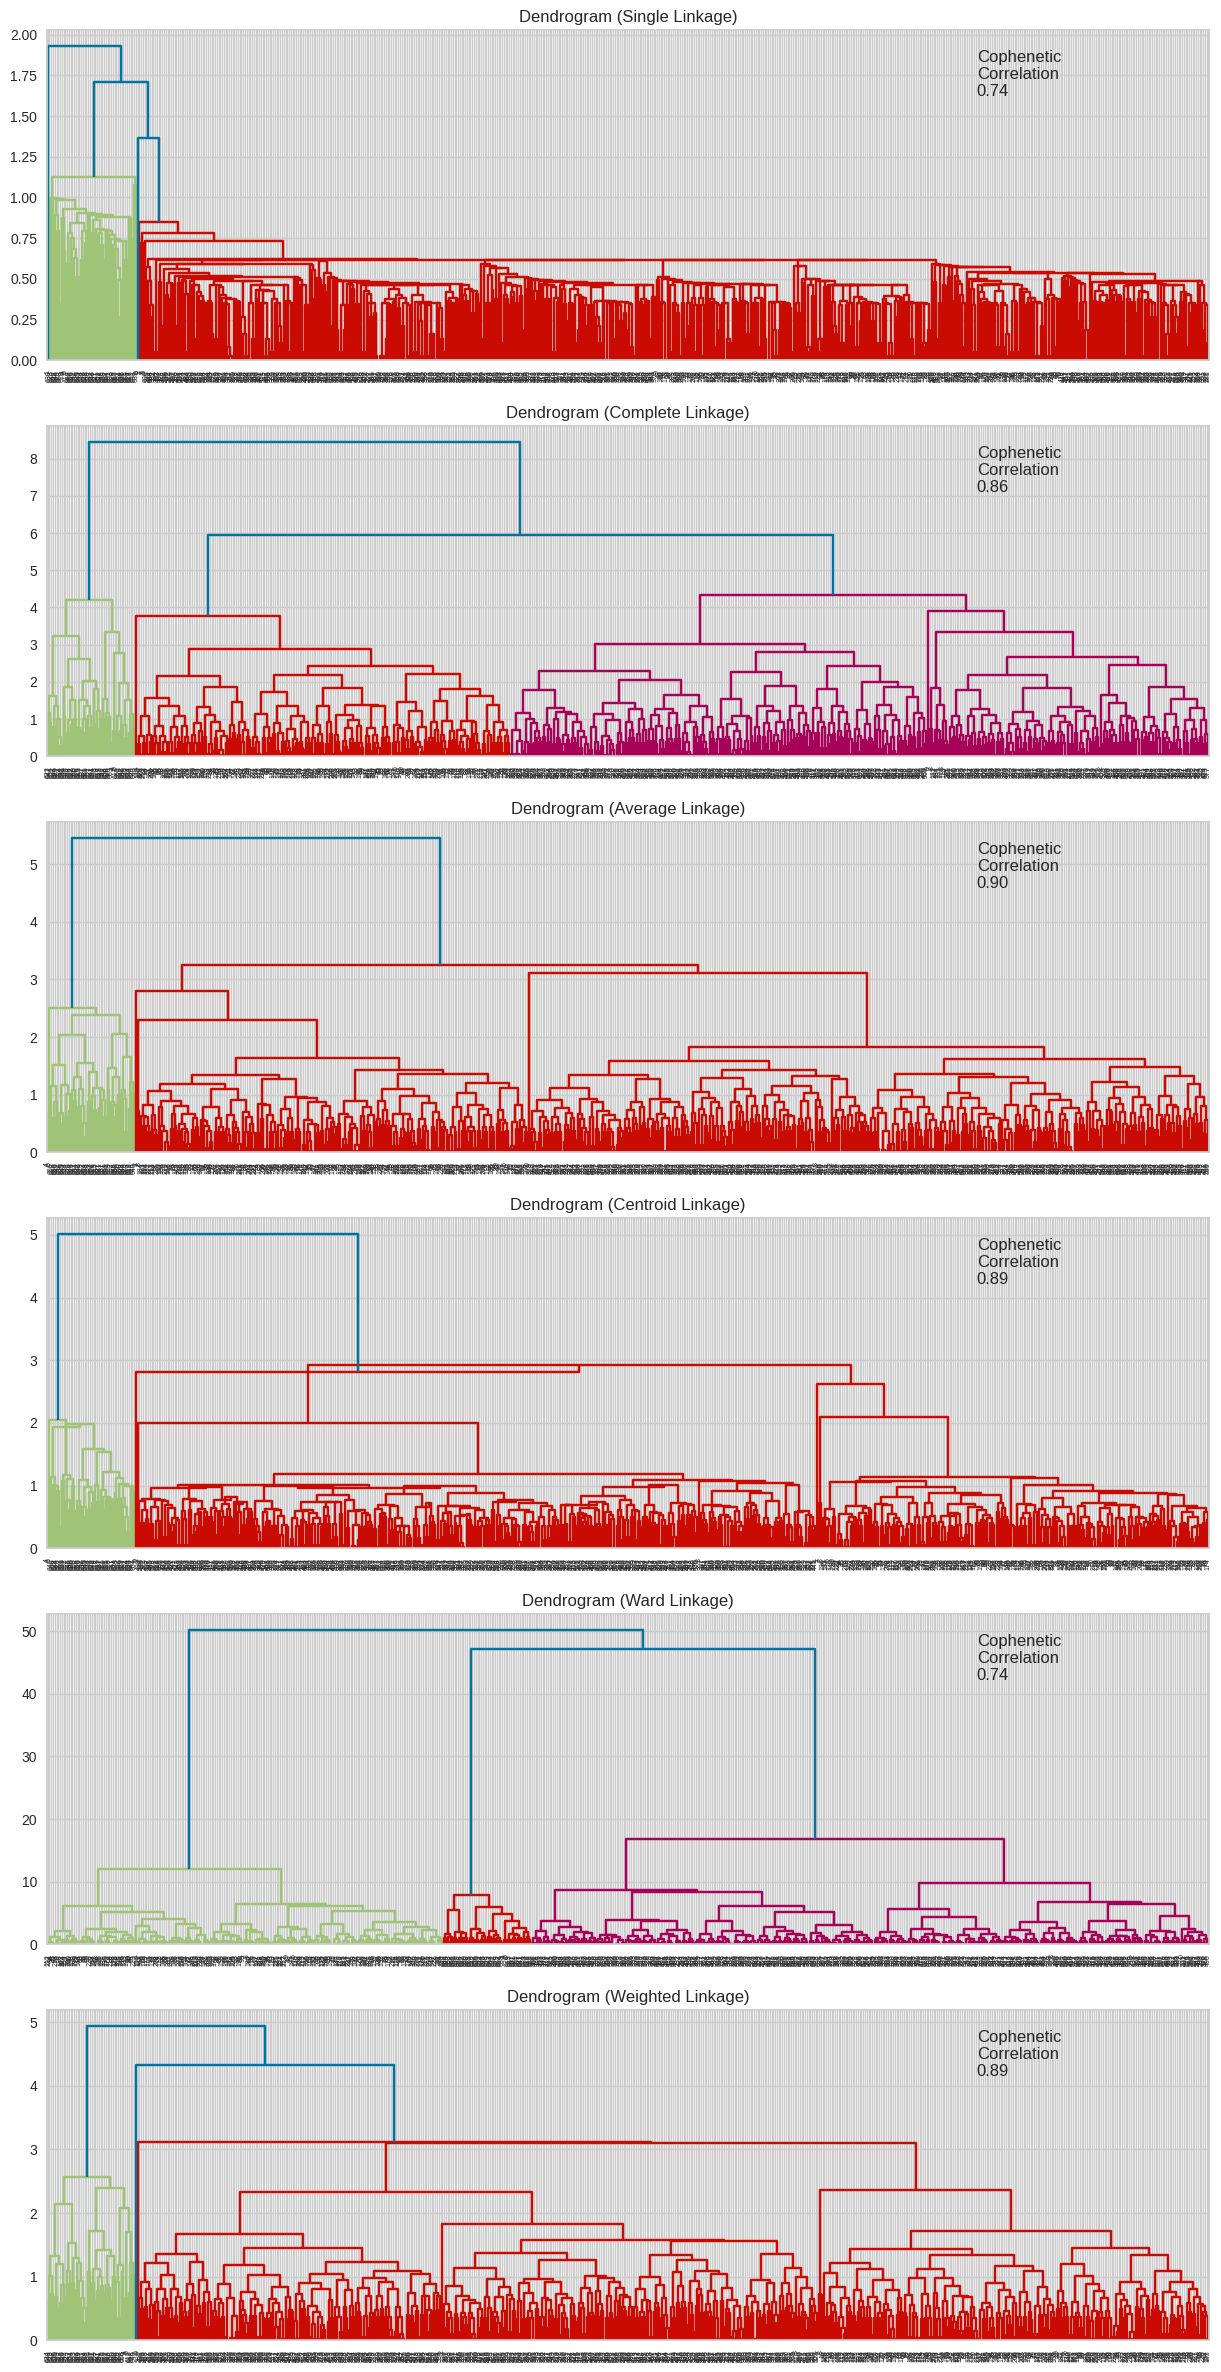

In [22]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

**Observations**

- The cophenetic correlation is highest for average and centroid linkage methods.
- We will move ahead with average linkage.
- 3 appears to be the appropriate number of clusters from the dendrogram for average linkage.

### Creating Final Model

In [23]:
hc = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="average")

hc_labels = hc.fit_predict(hc_subset_scaled_df)

In [24]:
hc_df["HC_segments"] = hc_labels

# **Cluster Profiling and Comparison**

## Cluster Profiling: K-means Clustering

In [ ]:
cluster_profile = km_df.groupby('KM_segments')[[
    'Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
    'Total_visits_online', 'Total_calls_made'
]].mean().round(2)

cluster_profile['Cluster_Size'] = km_df['KM_segments'].value_counts().sort_index()
print(cluster_profile)


             Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
KM_segments                                                            
0                    33782.38                5.52               3.49   
1                    12174.11                2.41               0.93   
2                   141040.00                8.74               0.60   

             Total_visits_online  Total_calls_made  Cluster_Size  
KM_segments                                                       
0                           0.98              2.00           386  
1                           3.55              6.87           224  
2                          10.90              1.08            50  


In [ ]:
def label_cluster(row):
    if row['Avg_Credit_Limit'] > 80000 and row['Total_calls_made'] < 2:
        return "High Spenders – Low Contact"
    elif row['Total_visits_bank'] > 3 and row['Total_visits_online'] < 2:
        return "Branch-Loyal Traditional Users"
    elif row['Total_visits_online'] > 6:
        return "Digitally Engaged Users"
    else:
        return "Others"

# Apply after reviewing profile
cluster_profile['Segment_Name'] = cluster_profile.apply(label_cluster, axis=1)

# Display final cluster profile
print(cluster_profile)

             Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
KM_segments                                                            
0                    33782.38                5.52               3.49   
1                    12174.11                2.41               0.93   
2                   141040.00                8.74               0.60   

             Total_visits_online  Total_calls_made  Cluster_Size  \
KM_segments                                                        
0                           0.98              2.00           386   
1                           3.55              6.87           224   
2                          10.90              1.08            50   

                               Segment_Name  
KM_segments                                  
0            Branch-Loyal Traditional Users  
1                                    Others  
2               High Spenders – Low Contact  


In [ ]:
# Step 1: Get unique cluster labels
clusters = km_df["KM_segments"].unique().tolist()

# Step 2: Loop through each cluster and print customer details
for cl in clusters:
    print(
        "The",
        km_df[km_df["KM_segments"] == cl]["Customer Key"].nunique(),
        "customers in cluster",
        cl,
        "are:"
    )
    print(km_df[km_df["KM_segments"] == cl]["Customer Key"].unique())  # Or use .tolist()
    print("-" * 100, "\n")


The 384 customers in cluster 0 are:
[87073 17341 40496 54838 35254 46635 97825 83125 35483 15129 83290 56486
 31903 45909 14263 46813 81878 35549 85799 39122 81531 69965 18595 44398
 32352 40898 27101 33457 45088 23302 27408 65372 21531 56843 17165 89328
 20072 71402 47496 24808 17036 67193 34423 97109 55382 51811 53936 66504
 53207 18514 51319 36340 36934 95925 49771 22919 21233 74544 52025 45652
 73952 49418 77026 49331 75775 54906 94666 11698 34677 95610 41380 38033
 85337 38994 67911 92956 77641 57565 53814 30712 19785 31384 16374 50878
 78002 83459 91987 51552 24998 45673 11596 87485 28414 81863 33240 11466
 23881 44645 49844 92782 22824 26767 26678 50412 17933 34495 47437 22610
 41159 64672 62483 85614 96548 19137 69028 70779 38244 67046 64897 46223
 36628 17565 77381 11799 81940 66706 87838 94437 33790 44402 29886 66804
 47866 61996 15318 89635 71681 71862 96186 22348 36243 88807 82376 98126
 80347 17649 62807 92522 57459 44579 45476 61994 11398 24702 27824 45878
 72431 19215 23

**Observations**

- Majority of the high spenders are in Cluster 1 and Cluster 2.

In [ ]:
# Step 1: Select the columns used for clustering
col_4_clustering = [
    'Avg_Credit_Limit',
    'Total_Credit_Cards',
    'Total_visits_bank',
    'Total_visits_online',
    'Total_calls_made'
]

# Step 2: Group by cluster and calculate mean
cluster_profiling_km = km_df.groupby("KM_segments")[col_4_clustering].mean()

# Step 3: Add count of customers in each cluster
cluster_profiling_km["count_in_each_segment"] = km_df.groupby("KM_segments")["Customer Key"].count().values

# Step 4: Highlight max values for each feature
cluster_profiling_km.style.highlight_max(color="lightgreen", axis=0)


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
KM_segments,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,12174.107143,2.410714,0.933036,3.553571,6.870536,224
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


In [ ]:
# let's plot the attributes of only the big clusters
c1 = [0, 1, 2]
km_df2 = km_df[km_df.KM_segments.isin(c1)]

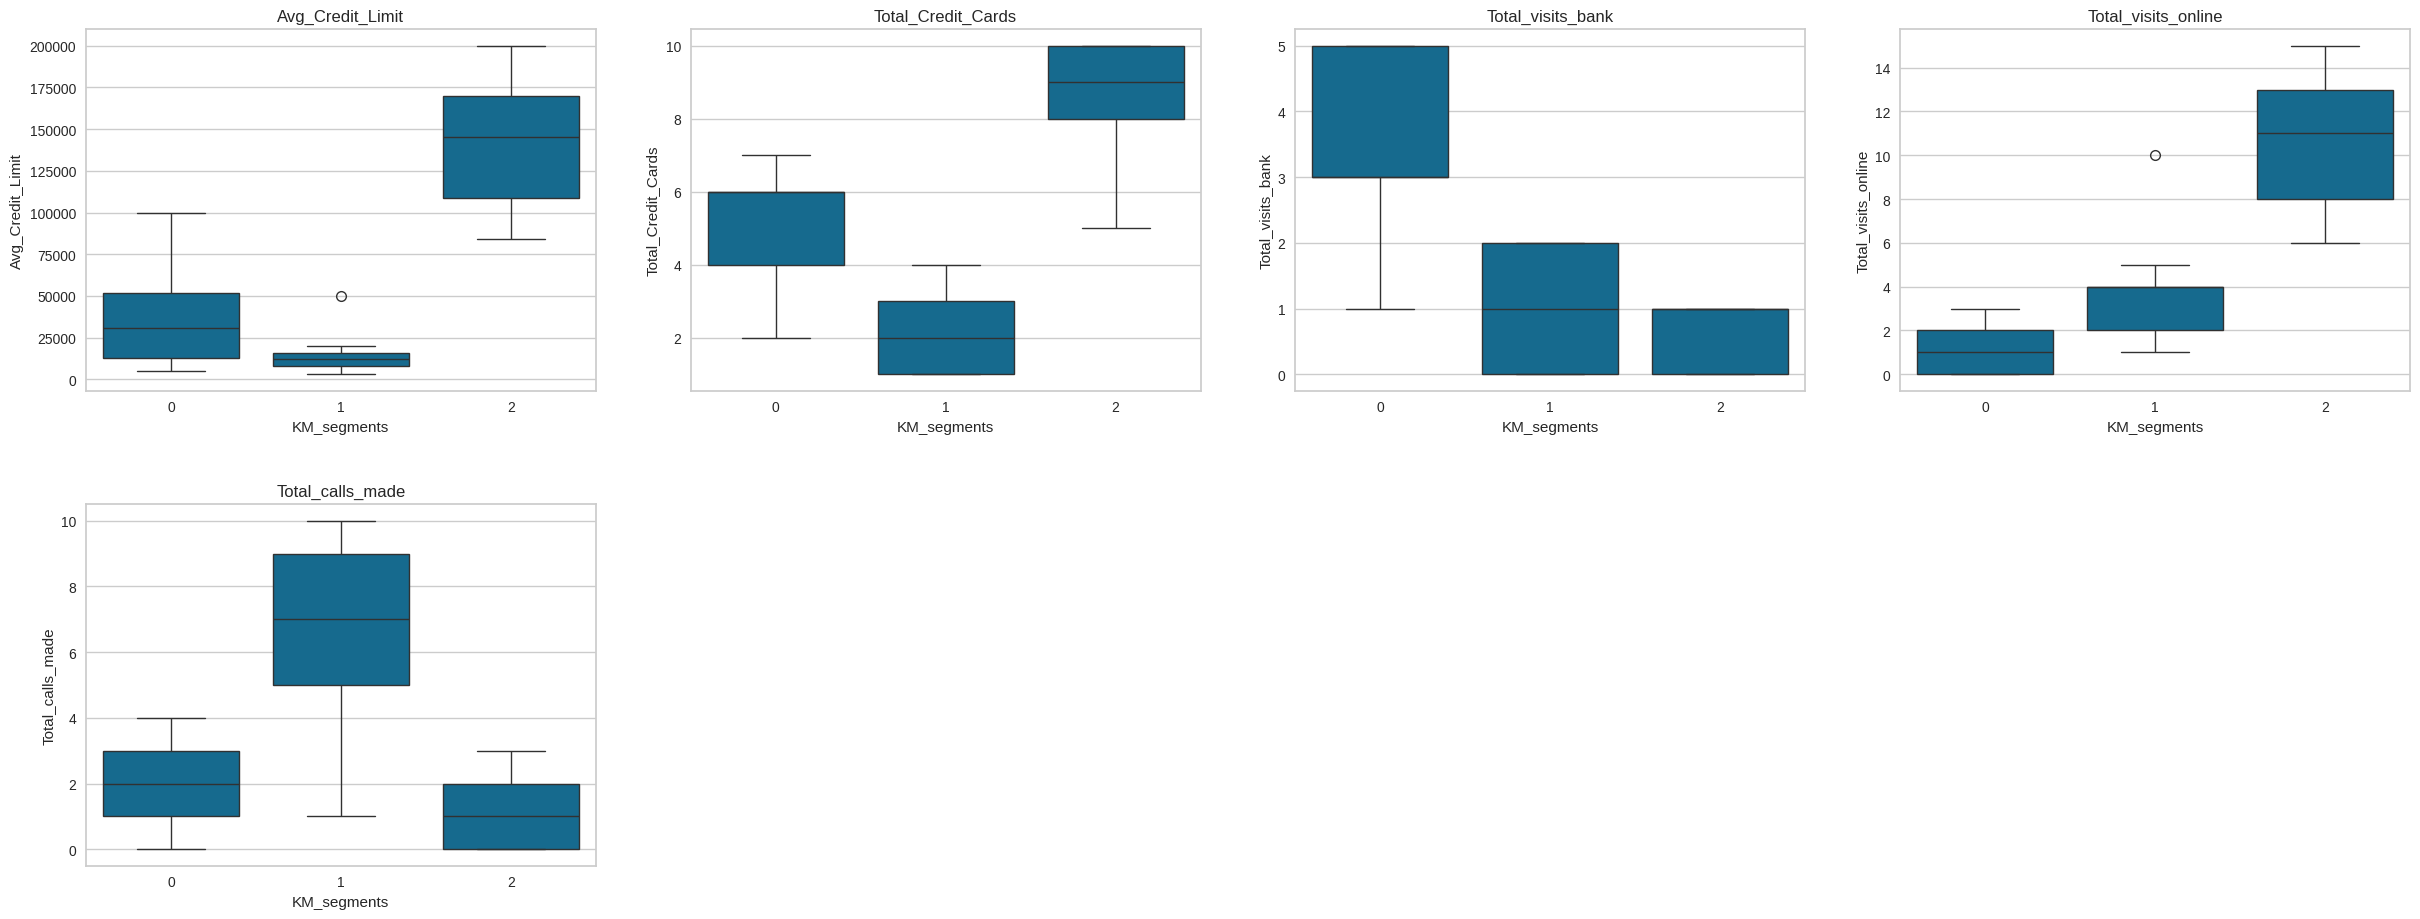

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Number of features to plot
num_features = len(col_4_clustering)

# Adjust subplot size based on actual number of features
rows = (num_features // 4) + 1
fig, axes = plt.subplots(rows, 4, figsize=(25, 5 * rows))

# Flatten axes to 1D array for easier indexing
axes = axes.flatten()

# Plot each feature in a boxplot
for i in range(num_features):
    sns.boxplot(
        ax=axes[i],
        x=km_df2["KM_segments"],
        y=km_df2[col_4_clustering[i]]
    )
    axes[i].set_title(col_4_clustering[i])

# Hide unused subplots (if any)
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout(pad=3.0)
plt.show()


### Insights

#### Cluster 0

**Spending Behavior**

* These customers have moderate credit limits — not low enough to be risk-averse,
but not premium either.

* They carry a moderate-to-high number of credit cards, indicating some level of trust or engagement with credit.

**Engagement Style**

* Heavily branch-reliant: Their frequent bank visits suggest they prefer in-person interactions or are not tech-savvy.

* Low digital engagement: Rarely use online services, indicating limited adoption of mobile/internet banking.

* Moderate support interaction: Reasonable number of calls, likely to resolve doubts that could’ve been solved online.


**Recommendations**

* **Marketing Strategy**
  * Promote personalized credit upgrades through branch visits

  * Offer training or workshops in-branch to introduce mobile banking

  * Bundle reward programs with offline spending channels

* **Operational Strategy**
  * Strengthen branch infrastructure: ensure low queue time, efficient handling

  * Assign dedicated relationship managers

  * Reduce phone traffic by promoting SMS/WhatsApp updates or IVR automation.


**Suggested Label:**
“Traditional In-Person Users” or “Branch-Heavy Moderate Spenders”

#### Cluster 1


**Spending Behavior**

* Very limited credit access: These customers operate with small credit limits and minimal card ownership.

* Likely newer or lower-value customers from a revenue perspective.

**Engagement Style**

* Low branch usage, indicating either preference for remote interaction or lack of interest in services.

* High dependency on support calls, which suggests:

  * Frustration with services

  * Lack of understanding of products

  * Possible dissatisfaction

  **Recommendations**

* **Marketing Strategy**
  * Avoid pushing premium or high-credit products immediately

  * Instead, offer basic, simplified digital banking tutorials

  * Promote chatbot or self-service FAQs to lower support dependence
  * Gradually upsell with offers like: “Increase your credit limit after X months of usage”

* **Operational Strategy**
  * Analyze support call logs: Identify common pain points

  * Build targeted communication around those issues (e.g., bill payments, due dates, etc.)

  * Route these users to junior service agents or automated IVR solutions to reduce cost-to-serve



**Suggested Label:**
“Low-Spend High-Maintenance Users” or
“Support-Heavy Low Value Customers”

#### Cluster 2


**Spending Behavior**

* These are the top-tier customers: very high credit limits and large number of cards.

* Indicates strong trust, long-term engagement, and high revenue potential.


**Engagement Style**

* Strongly digital-first: almost all interactions are online, very few branch visits or phone calls.

* Low support dependency suggests comfort with self-service tools and high digital maturity.

 **Recommendations**

* **Marketing Strategy**
  * Upsell premium offerings like travel perks, concierge services, black cards

  * Use targeted digital campaigns (email/app push) instead of phone/branch

  * Offer cashback or loyalty programs integrated into online purchases

* **Operational Strategy**
  * Ensure seamless digital experience: mobile app, web portal, 24x7 chatbot

  * Promote auto-servicing tools: limit increase, card upgrades, statement downloads

  * Maintain proactive alerts for fraud/security — important for trust


  
**Suggested Label:**
“Digitally Engaged Premium Customers”
or
“High-Value Low-Touch Users”

## Cluster Profiling: Hierarchical Clustering

In [ ]:
cluster_profile = hc_df.groupby('HC_segments')[[
    'Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
    'Total_visits_online', 'Total_calls_made'
]].mean().round(2)

cluster_profile['Cluster_Size'] = hc_df["HC_segments"].value_counts().sort_index()
print(cluster_profile)


             Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
HC_segments                                                            
0                    33713.18                5.51               3.49   
1                   141040.00                8.74               0.60   
2                    12197.31                2.40               0.93   

             Total_visits_online  Total_calls_made  Cluster_Size  
HC_segments                                                       
0                           0.98              2.01           387  
1                          10.90              1.08            50  
2                           3.56              6.88           223  


In [ ]:
def label_cluster(row):
    if row['Avg_Credit_Limit'] > 80000 and row['Total_calls_made'] < 2:
        return "High Spenders – Low Contact"
    elif row['Total_visits_bank'] > 3 and row['Total_visits_online'] < 2:
        return "Branch-Loyal Traditional Users"
    elif row['Total_visits_online'] > 6:
        return "Digitally Engaged Users"
    else:
        return "Others"

# Apply after reviewing profile
cluster_profile['Segment_Name'] = cluster_profile.apply(label_cluster, axis=1)

# Display final cluster profile
print(cluster_profile)

             Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
HC_segments                                                            
0                    33713.18                5.51               3.49   
1                   141040.00                8.74               0.60   
2                    12197.31                2.40               0.93   

             Total_visits_online  Total_calls_made  Cluster_Size  \
HC_segments                                                        
0                           0.98              2.01           387   
1                          10.90              1.08            50   
2                           3.56              6.88           223   

                               Segment_Name  
HC_segments                                  
0            Branch-Loyal Traditional Users  
1               High Spenders – Low Contact  
2                                    Others  


In [ ]:
# Step 1: Get unique cluster labels
clusters1 = hc_df["HC_segments"].unique().tolist()

# Step 2: Loop through each cluster and print customer details
for cl in clusters1:
    print(
        "The",
        hc_df[hc_df["HC_segments"] == cl]["Customer Key"].nunique(),
        "customers in cluster",
        cl,
        "are:"
    )
    print(hc_df[hc_df["HC_segments"] == cl]["Customer Key"].unique())  # Or use .tolist()
    print("-" * 100, "\n")

The 385 customers in cluster 0 are:
[87073 17341 40496 54838 35254 46635 97825 83125 35483 15129 83290 56486
 31903 45909 14263 46813 81878 35549 85799 39122 81531 69965 18595 44398
 32352 40898 27101 33457 45088 23302 27408 65372 21531 56843 17165 89328
 20072 71402 47496 24808 17036 67193 34423 97109 55382 51811 53936 66504
 53207 18514 51319 36340 36934 95925 49771 22919 21233 74544 52025 45652
 73952 49418 77026 49331 75775 54906 94666 11698 34677 95610 41380 38033
 85337 38994 67911 92956 77641 57565 53814 30712 19785 31384 16374 50878
 78002 83459 91987 51552 72156 24998 45673 11596 87485 28414 81863 33240
 11466 23881 44645 49844 92782 22824 26767 26678 50412 17933 34495 47437
 22610 41159 64672 62483 85614 96548 19137 69028 70779 38244 67046 64897
 46223 36628 17565 77381 11799 81940 66706 87838 94437 33790 44402 29886
 66804 47866 61996 15318 89635 71681 71862 96186 22348 36243 88807 82376
 98126 80347 17649 62807 92522 57459 44579 45476 61994 11398 24702 27824
 45878 72431 19

In [ ]:
# Step 1: Select the columns used for clustering
col_4_clustering = [
    'Avg_Credit_Limit',
    'Total_Credit_Cards',
    'Total_visits_bank',
    'Total_visits_online',
    'Total_calls_made'
]

# Step 2: Group by cluster and calculate mean
cluster_profiling_hc = hc_df.groupby("HC_segments")[col_4_clustering].mean()

# Step 3: Add count of customers in each cluster
cluster_profiling_hc["count_in_each_segment"] = hc_df.groupby("HC_segments")["Customer Key"].count().values

# Step 4: Highlight max values for each feature
cluster_profiling_hc.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
HC_segments,,,,,,
0,33713.178295,5.511628,3.485788,0.984496,2.005168,387
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,12197.309417,2.403587,0.928251,3.560538,6.883408,223


In [ ]:
# let's plot the attributes of only the big clusters
c1 = [0, 1, 2]
hc_df2 = hc_df[hc_df.HC_segments.isin(c1)]

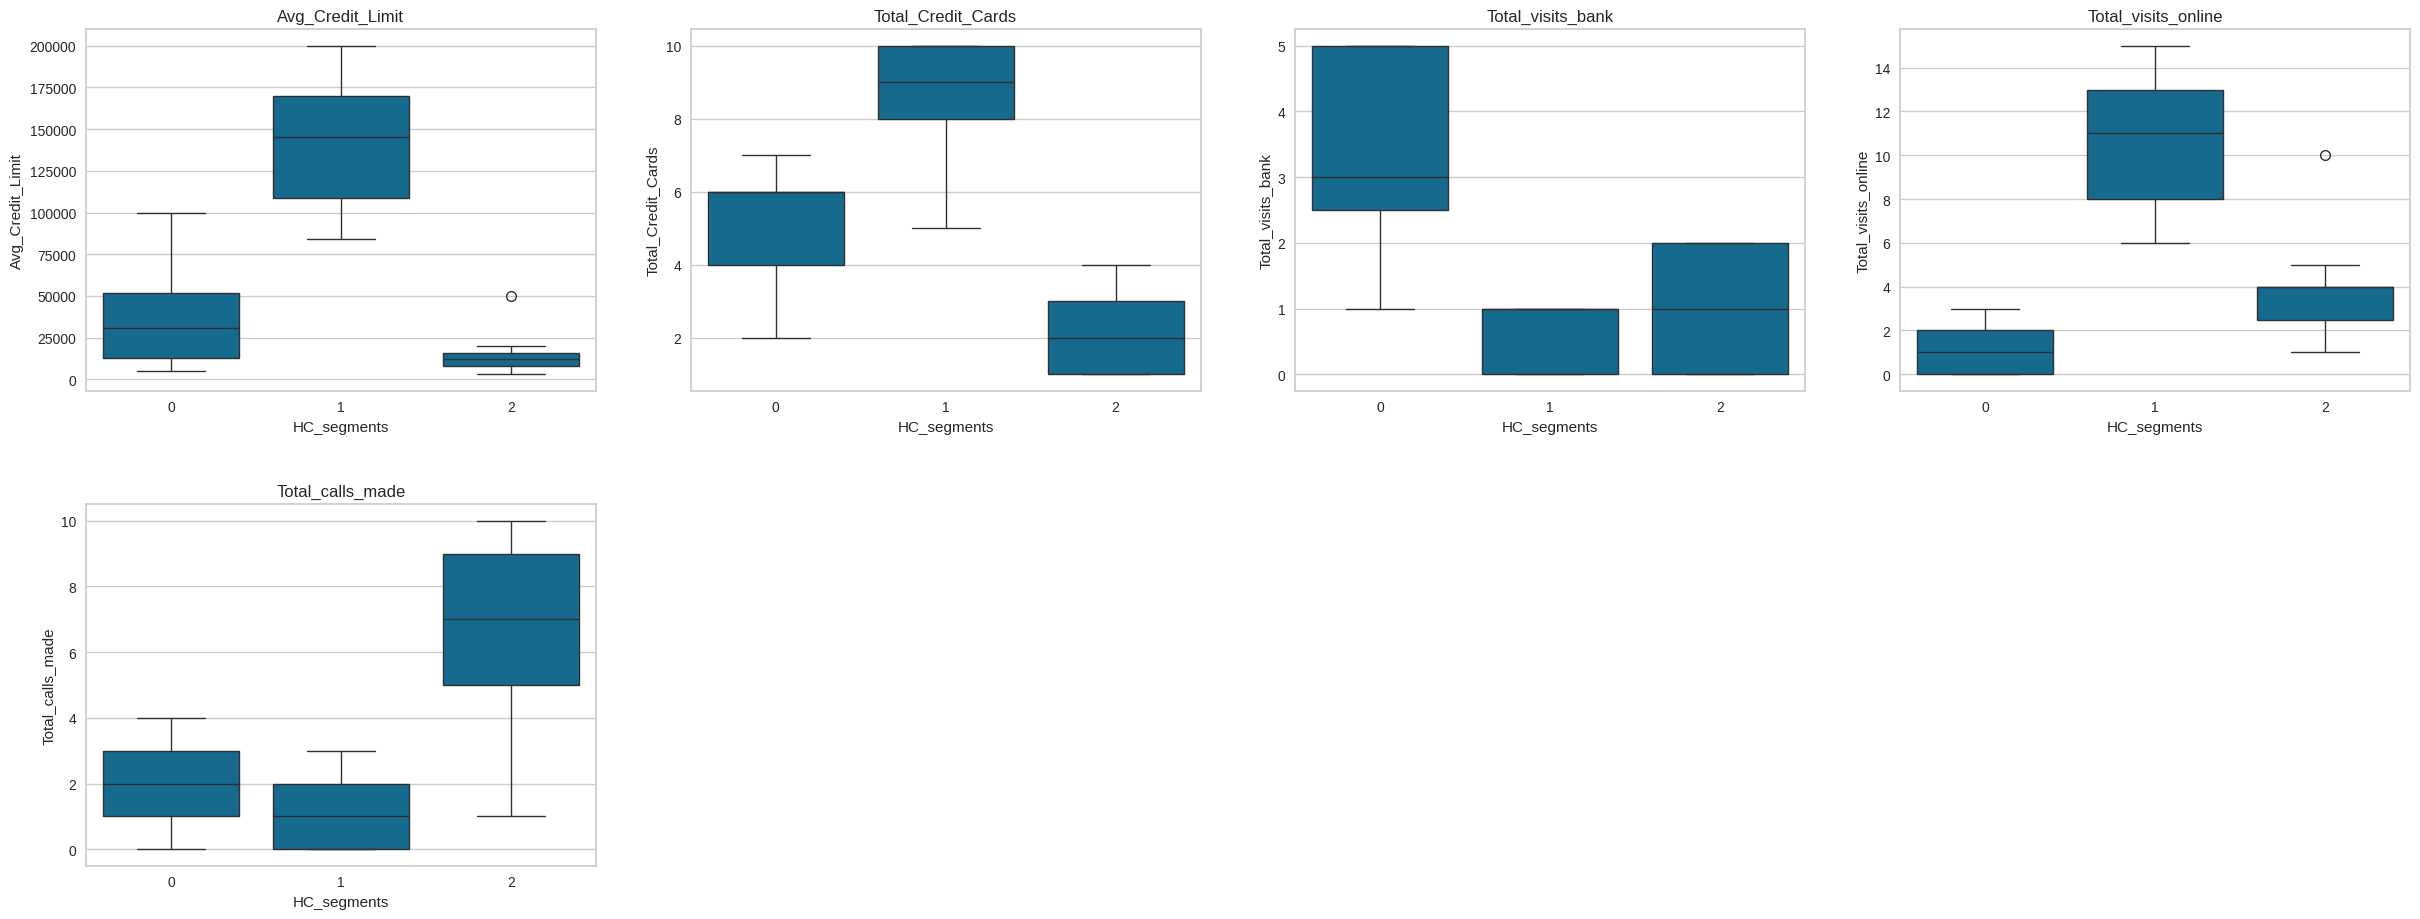

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Number of features to plot
num_features = len(col_4_clustering)

# Adjust subplot size based on actual number of features
rows = (num_features // 4) + 1
fig, axes = plt.subplots(rows, 4, figsize=(25, 5 * rows))

# Flatten axes to 1D array for easier indexing
axes = axes.flatten()

# Plot each feature in a boxplot
for i in range(num_features):
    sns.boxplot(
        ax=axes[i],
        x=hc_df2["HC_segments"],
        y=hc_df2[col_4_clustering[i]]
    )
    axes[i].set_title(col_4_clustering[i])

# Hide unused subplots (if any)
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout(pad=3.0)
plt.show()

### Insights

#### Cluster 0

**Spending Behavior**

* These customers are middle-of-the-road spenders: not premium, but not low-value either.

* They possess multiple credit cards, showing moderate engagement with financial products.

**Engagement Style**

* Strong reliance on in-person banking — the highest number of branch visits.

* Extremely low digital interaction, indicating either:
  * Preference for face-to-face service

  * Low comfort with digital channels

* Moderate number of support calls — may seek assistance when self-service isn’t viable.


**Recommendations**

* **Marketing Strategy**
  * Focus on offline relationship-building: in-branch offers, exclusive desk services

  * Introduce limited digital onboarding with support (e.g., demo days at branches)

  * Recommend rewards for offline usage (e.g., restaurant or local retail partners)


* **Operational Strategy**
  * Enhance in-branch service capacity (more tellers, shorter wait times)

  * Provide in-branch digital training to migrate some services online

  * Create hybrid engagement plans: start offline, transition to mobile app gradually


**Suggested Label:**
"Traditional In-Branch Customers"
or
"Moderate Spenders with Branch Preference"

#### Cluster 1

**Spending Behavior**

* These are your top-tier customers with very high credit limits and the highest number of credit cards.


* Likely experienced, trusted, and financially mature users who handle multiple financial products with ease.


**Engagement Style**

* Digital-first: They strongly prefer online interactions with the bank and are confident in managing their accounts digitally.

* Minimal support dependency: Few calls made, indicating self-reliance and high comfort with systems.

* Almost no in-branch visits, reinforcing their preference for seamless remote banking.

**Recommendations**

* **Marketing Strategy**
  * Introduce premium lifestyle benefits: travel perks, concierge services, lounge access

  * Offer AI-powered financial planning tools, personalized credit upgrades, and reward tracking within the mobile app

  * Launch exclusive digital-only offers and pre-approved upgrades


* **Operational Strategy**
  * Prioritize mobile app performance and UI enhancements

  * Provide real-time chat support or virtual assistants instead of IVR or branch

  * Invest in data security and fraud prevention features to maintain their trust


**Suggested Label:**
"Digitally Native High-Value Customers"
or
"Premium Digital-First Segment"

#### Cluster 2

**Spending Behavior**

* These are low-credit customers with minimal card usage, likely new or risk-averse.


* Their limited credit limit suggests they’re not targeted with premium financial products yet.


**Engagement Style**

* Heavy reliance on support calls: They reach out frequently, possibly due to:
  * Difficulty understanding services

  * Lack of digital literacy

  * Frustration or confusion

* Moderate online usage shows they may have started using digital tools but aren’t fully comfortable.

* Occasional branch visits round out a mixed-mode engagement style, neither fully digital nor traditional.

**Recommendations**

* **Marketing Strategy**
  * Avoid premium upsell for now

  * Offer basic digital literacy programs (tutorials, in-app walkthroughs)

  * Use SMS or IVR-based nudges to guide them toward digital actions (e.g., bill pay, limit check)


* **Operational Strategy**
  * Analyze support call topics and automate answers for common queries

  * Assign dedicated agents or IVR flows to reduce pressure on call centers

  * Introduce simple, visual mobile features — fewer steps, language options


**Suggested Label:**
"Support-Dependent Low-Value Users"
or
"Digitally Struggling New Customers"

## K-means vs Hierarchical Clustering

In [ ]:
cluster_profiling_km.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
KM_segments,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,12174.107143,2.410714,0.933036,3.553571,6.870536,224
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


In [ ]:
cluster_profiling_hc.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
HC_segments,,,,,,
0,33713.178295,5.511628,3.485788,0.984496,2.005168,387
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,12197.309417,2.403587,0.928251,3.560538,6.883408,223


In [ ]:
km_df["KM_segments"] = km_df["KM_segments"].replace({1: 2, 2: 1, 0: 0})

cluster_profiling_km = km_df.groupby("KM_segments")[col_4_clustering].mean()

# Step 3: Add count of customers in each cluster
cluster_profiling_km["count_in_each_segment"] = km_df.groupby("KM_segments")["Customer Key"].count().values

# Step 4: Highlight max values for each feature
cluster_profiling_km.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
KM_segments,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,12174.107143,2.410714,0.933036,3.553571,6.870536,224


In [ ]:
# Step 1: Get unique cluster labels
clusters = km_df["KM_segments"].unique().tolist()

# Step 2: Loop through each cluster and print customer details
for cl in clusters:
    print(
        "The",
        km_df[km_df["KM_segments"] == cl]["Customer Key"].nunique(),
        "customers in cluster",
        cl,
        "are:"
    )
    print(km_df[km_df["KM_segments"] == cl]["Customer Key"].unique())  # Or use .tolist()
    print("-" * 100, "\n")


The 384 customers in cluster 0 are:
[87073 17341 40496 54838 35254 46635 97825 83125 35483 15129 83290 56486
 31903 45909 14263 46813 81878 35549 85799 39122 81531 69965 18595 44398
 32352 40898 27101 33457 45088 23302 27408 65372 21531 56843 17165 89328
 20072 71402 47496 24808 17036 67193 34423 97109 55382 51811 53936 66504
 53207 18514 51319 36340 36934 95925 49771 22919 21233 74544 52025 45652
 73952 49418 77026 49331 75775 54906 94666 11698 34677 95610 41380 38033
 85337 38994 67911 92956 77641 57565 53814 30712 19785 31384 16374 50878
 78002 83459 91987 51552 24998 45673 11596 87485 28414 81863 33240 11466
 23881 44645 49844 92782 22824 26767 26678 50412 17933 34495 47437 22610
 41159 64672 62483 85614 96548 19137 69028 70779 38244 67046 64897 46223
 36628 17565 77381 11799 81940 66706 87838 94437 33790 44402 29886 66804
 47866 61996 15318 89635 71681 71862 96186 22348 36243 88807 82376 98126
 80347 17649 62807 92522 57459 44579 45476 61994 11398 24702 27824 45878
 72431 19215 23

# **Add-on: PCA for Visualization**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced_pca = pca.fit_transform(subset_scaled_df)

# storing results in a dataframe
reduced_data_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

# checking the amount of variance explained
print(
    f"The first two principal components explain {np.round(100*pca.explained_variance_ratio_.sum(), 2)}% of the variance in the data."
)

The first two principal components explain 83.16% of the variance in the data.


<Axes: xlabel='Component 1', ylabel='Component 2'>

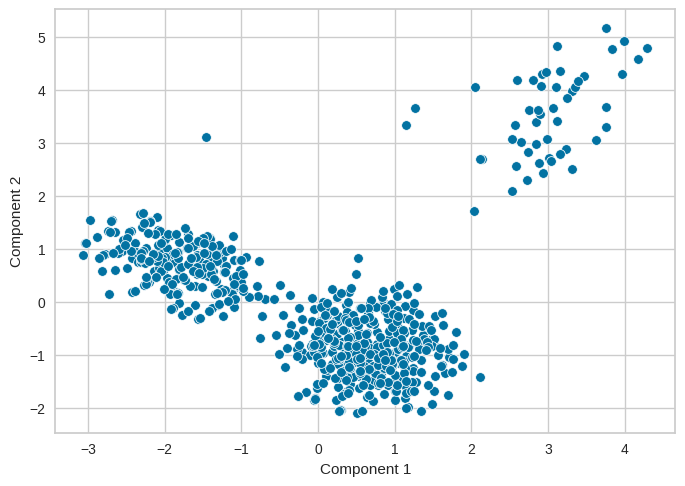

In [ ]:
sns.scatterplot(data=reduced_data_df_pca, x="Component 1", y="Component 2")

<Axes: xlabel='Component 1', ylabel='Component 2'>

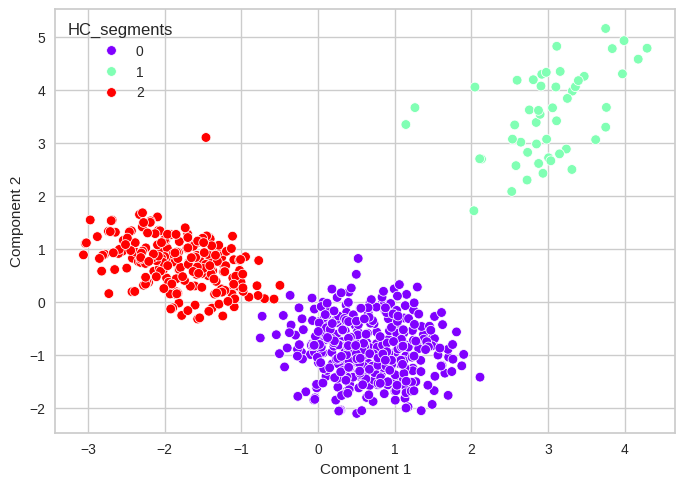

In [ ]:
sns.scatterplot(
    data=reduced_data_df_pca,
    x="Component 1",
    y="Component 2",
    hue=hc_df["HC_segments"],
    palette="rainbow",
)

**Cluster 0 (Purple)**

This cluster likely represents a stable, homogeneous group.
In a customer segmentation context, these might be:

Loyal customers with consistent behavior

Similar income, usage pattern, or purchase frequency

**Cluster 2 (Red)**

Also a cohesive group but with different characteristics than Cluster 0.
Possible interpretations:

A second group of customers with lower spending or engagement

Different preferences or demographics

**Cluster 1 (Green)**

Possibly a distinct, niche group

Could represent high-value or unusual behavior (e.g., VIPs or outliers)

Also might indicate less data density in this segment